<a href="https://colab.research.google.com/github/jdexbarr/Neural-networks/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Number of examples
n = 600

In [ ]:
# Caractheristics: size, room number, and distance from the center
np.random.seed(0)

size = np.random.uniform(50,200,n) # We take houses from 50 m^2 to 200 m^2
rooms = np.random.uniform(1,6,n)  # Min 1 rooms, max 6 rooms
distance = np.random.uniform(1,20,n) # Min 1 km, max 20 km


# Formula to determine price, I used estimades values for simpleness

price = (size*3000) + (rooms*10000) - (distance*5000) + np.random.normal(0, 20000, n)

In [ ]:
# Matriz
X = np.column_stack((size, rooms, distance))
y = price

In [ ]:
# MODEL

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)   # continuos output
])

#compiling the model

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
    )

In [ ]:
# Training
history = model.fit(
    X, y,
    epochs=60,
    batch_size=16,
    validation_split=0.2,
    verbose =0
)

# To be sure training is finished

print("FINISHED TRAINING")

FINISHED TRAINING


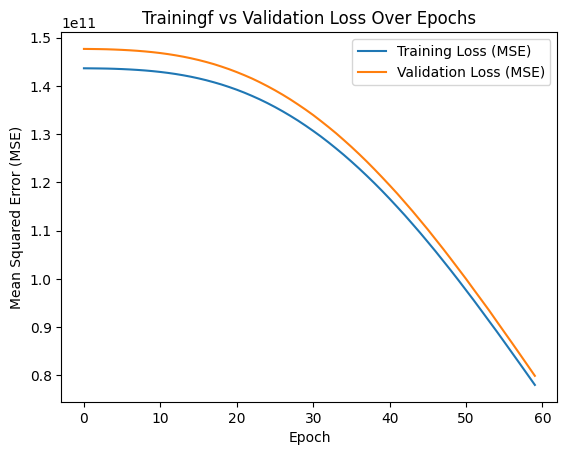

In [ ]:
# Now the graph of loss, to see if the network is learning and have a quick sight of the performance
# Blue linea represents the errors of the data in the training
# orange line represents the data the model didnt used to train
#epoch is the iteraration

plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Trainingf vs Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
#Trying the model using a new house generated
house = np.array([165, 4, 15])

prediction_price = model.predict(np.expand_dims(house, axis=0))
print(f"Prediction of the cost of the house: ${prediction_price[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction of the cost of the house: $129,559.10
